### Working of SARIMA model
#### Data Mining Project, done by Waleed Saeed and Yahya Qureshi

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

In [31]:
file_path = 'Data.csv'
data = pd.read_csv(file_path)

cycle_data = data['cycle']
cycle_dates = data['date']

# Split the data into training and test sets
train_ratio = 0.85
split_idx = int(len(cycle_data) * train_ratio)
train_data = cycle_data.iloc[:split_idx]
test_data = cycle_data.iloc[split_idx:]

train_ratio = 0.85
split_idx = int(len(cycle_dates) * train_ratio)
train_dates = cycle_dates.iloc[:split_idx]
test_dates = cycle_dates.iloc[split_idx:]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


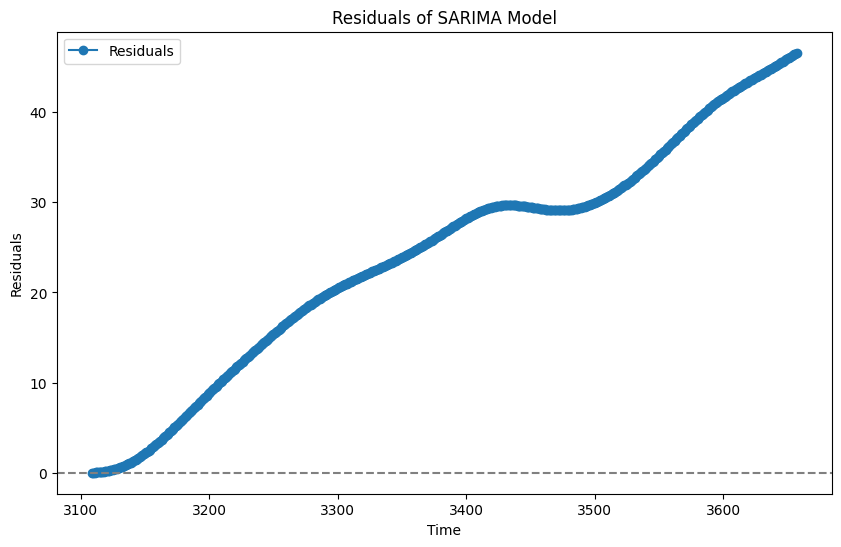

Ljung-Box test result:
         lb_stat  lb_pvalue
10  5196.954933        0.0


In [32]:
# Example SARIMA model specification, assuming a potential yearly seasonality
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Forecast and calculate residuals
forecast = model_fit.forecast(steps=len(test_data))
residuals = test_data - forecast

# Residual plot
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Residuals of SARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Re-run Ljung-Box test
lb_result = acorr_ljungbox(residuals.dropna(), lags=[10], return_df=True)
print("Ljung-Box test result:\n", lb_result)


In [33]:
# Load the dataset
co2_data = pd.read_csv(file_path)

# Display the first few rows and data info to understand its structure
co2_data.head(), co2_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          3658 non-null   int64  
 1   date        3658 non-null   object 
 2   Unnamed: 0  3658 non-null   int64  
 3   year        3658 non-null   int64  
 4   month       3658 non-null   int64  
 5   day         3658 non-null   int64  
 6   cycle       3658 non-null   float64
 7   trend       3658 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 228.8+ KB


(   id        date  Unnamed: 0  year  month  day   cycle   trend
 0   0  2013-01-20           0  2013      1   20  395.64  394.41
 1   1  2013-01-21           1  2013      1   21  395.67  394.42
 2   2  2013-01-22           2  2013      1   22  395.69  394.43
 3   3  2013-01-23           3  2013      1   23  395.72  394.43
 4   4  2013-01-24           4  2013      1   24  395.75  394.44,
 None)

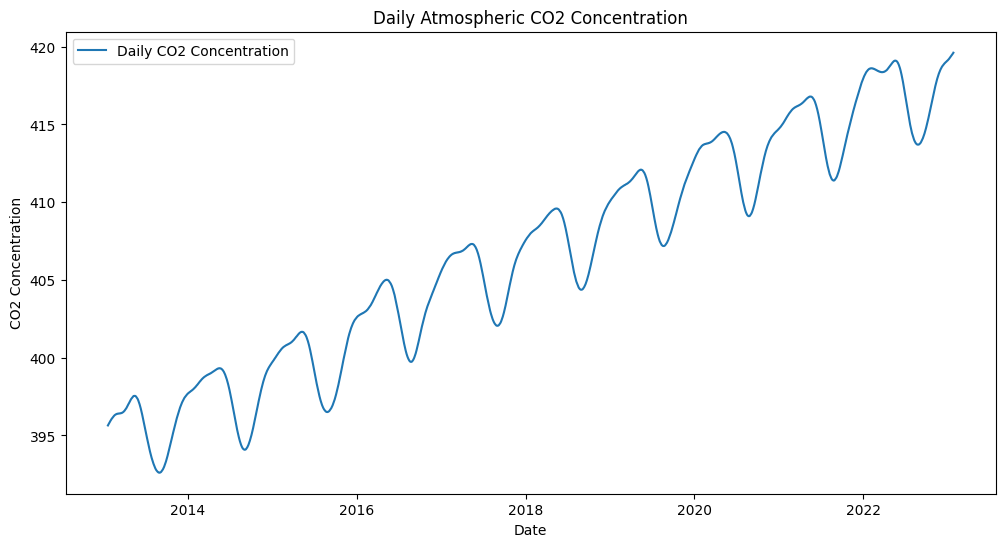

In [34]:
# Load data
data = pd.read_csv(file_path)

# Combine year, month, day into a datetime column and set as index
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data.set_index('date', inplace=True)

# Drop unnecessary columns
data.drop(columns=['Unnamed: 0', 'year', 'month', 'day'], inplace=True)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(data['cycle'], label='Daily CO2 Concentration')
plt.title('Daily Atmospheric CO2 Concentration')
plt.xlabel('Date')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.show()


In [35]:
# Perform Augmented Dickey-Fuller test
adf_result = adfuller(data['cycle'])

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
for key, value in adf_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


ADF Statistic: -1.4351614591699593
p-value: 0.5653080782144725
Critial Values:
   1%, -3.4321542277654946
Critial Values:
   5%, -2.8623372071683546
Critial Values:
   10%, -2.567194365720777


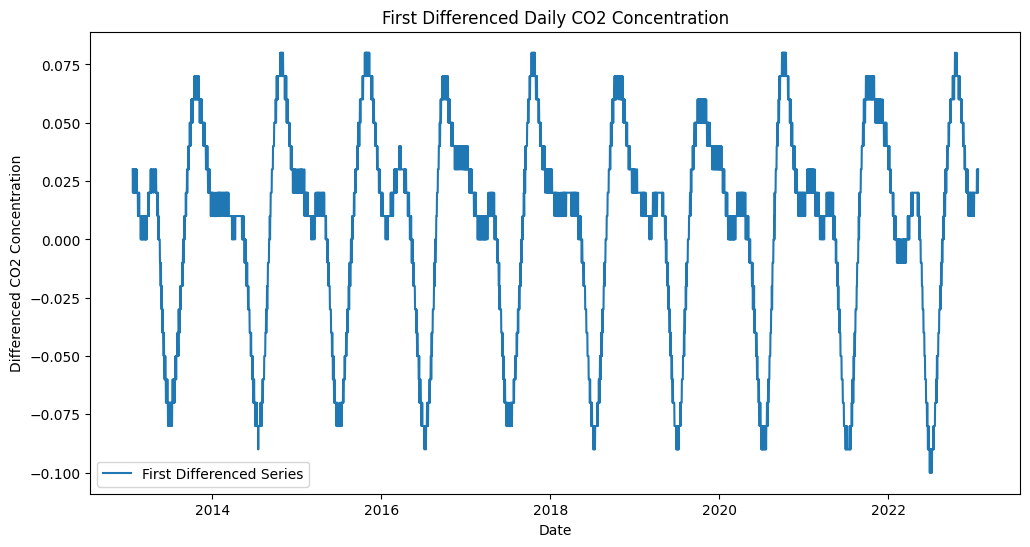

In [36]:
# Apply first differencing
data['cycle_diff'] = data['cycle'].diff().dropna()

# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(data['cycle_diff'], label='First Differenced Series')
plt.title('First Differenced Daily CO2 Concentration')
plt.xlabel('Date')
plt.ylabel('Differenced CO2 Concentration')
plt.legend()
plt.show()


In [37]:
# Perform Augmented Dickey-Fuller test on the differenced series
adf_result_diff = adfuller(data['cycle_diff'].dropna())

print(f'ADF Statistic: {adf_result_diff[0]}')
print(f'p-value: {adf_result_diff[1]}')
for key, value in adf_result_diff[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


ADF Statistic: -4.307904225001889
p-value: 0.0004304185280250272
Critial Values:
   1%, -3.432154725699155
Critial Values:
   5%, -2.8623374271161723
Critial Values:
   10%, -2.567194482813802


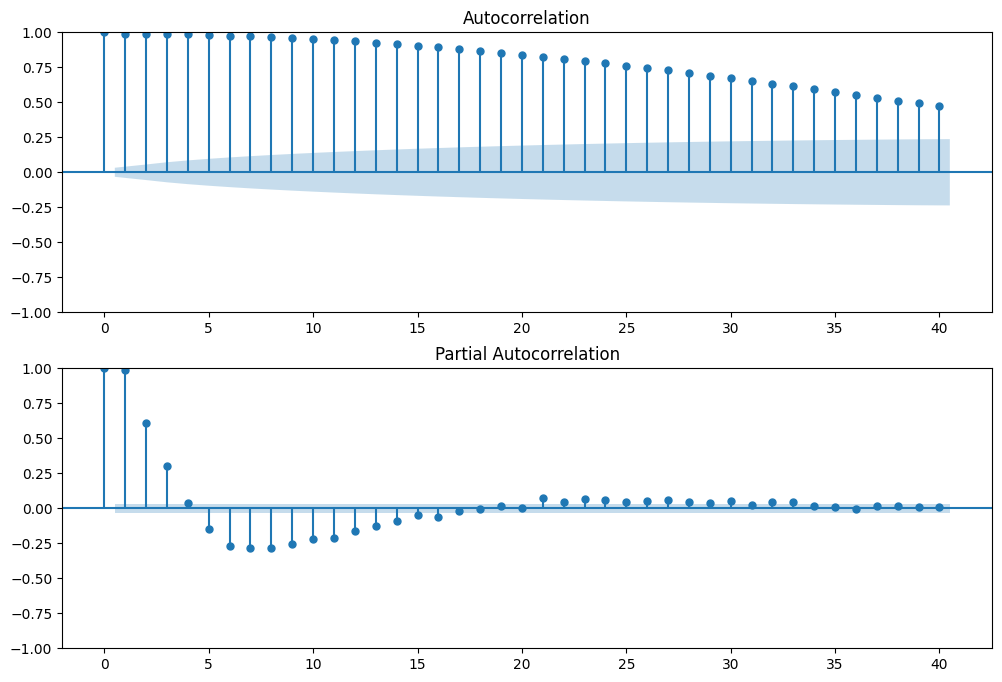

In [38]:
# Plot ACF and PACF for the differenced series
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data['cycle_diff'].dropna(), lags=40, ax=axes[0])
plot_pacf(data['cycle_diff'].dropna(), lags=40, ax=axes[1])
plt.show()


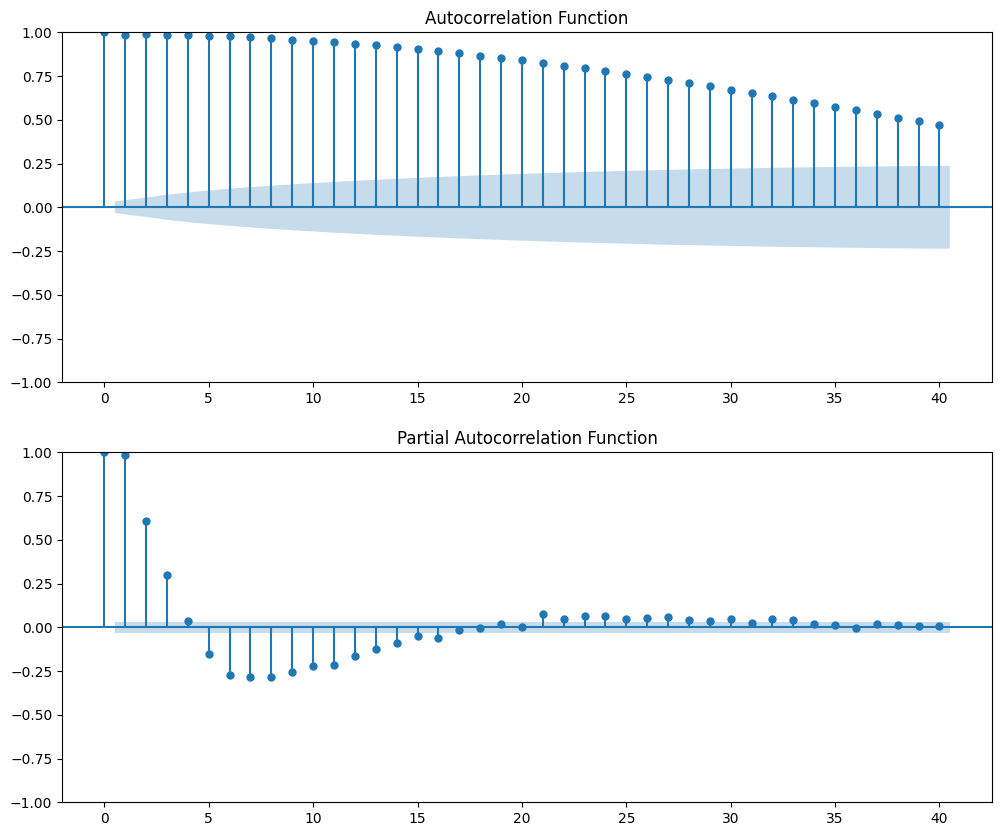

In [39]:
# Plotting the ACF and PACF
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
plot_acf(data['cycle_diff'].dropna(), lags=40, ax=axes[0], title='Autocorrelation Function')
plot_pacf(data['cycle_diff'].dropna(), lags=40, ax=axes[1], title='Partial Autocorrelation Function')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              cycle   No. Observations:                 3658
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               13598.762
Date:                            Thu, 16 May 2024   AIC                         -27187.524
Time:                                    13:46:09   BIC                         -27156.538
Sample:                                01-20-2013   HQIC                        -27176.486
                                     - 01-25-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9976      0.001    830.933      0.000       0.995       1.000
ma.L1         -0.5969      0.017   

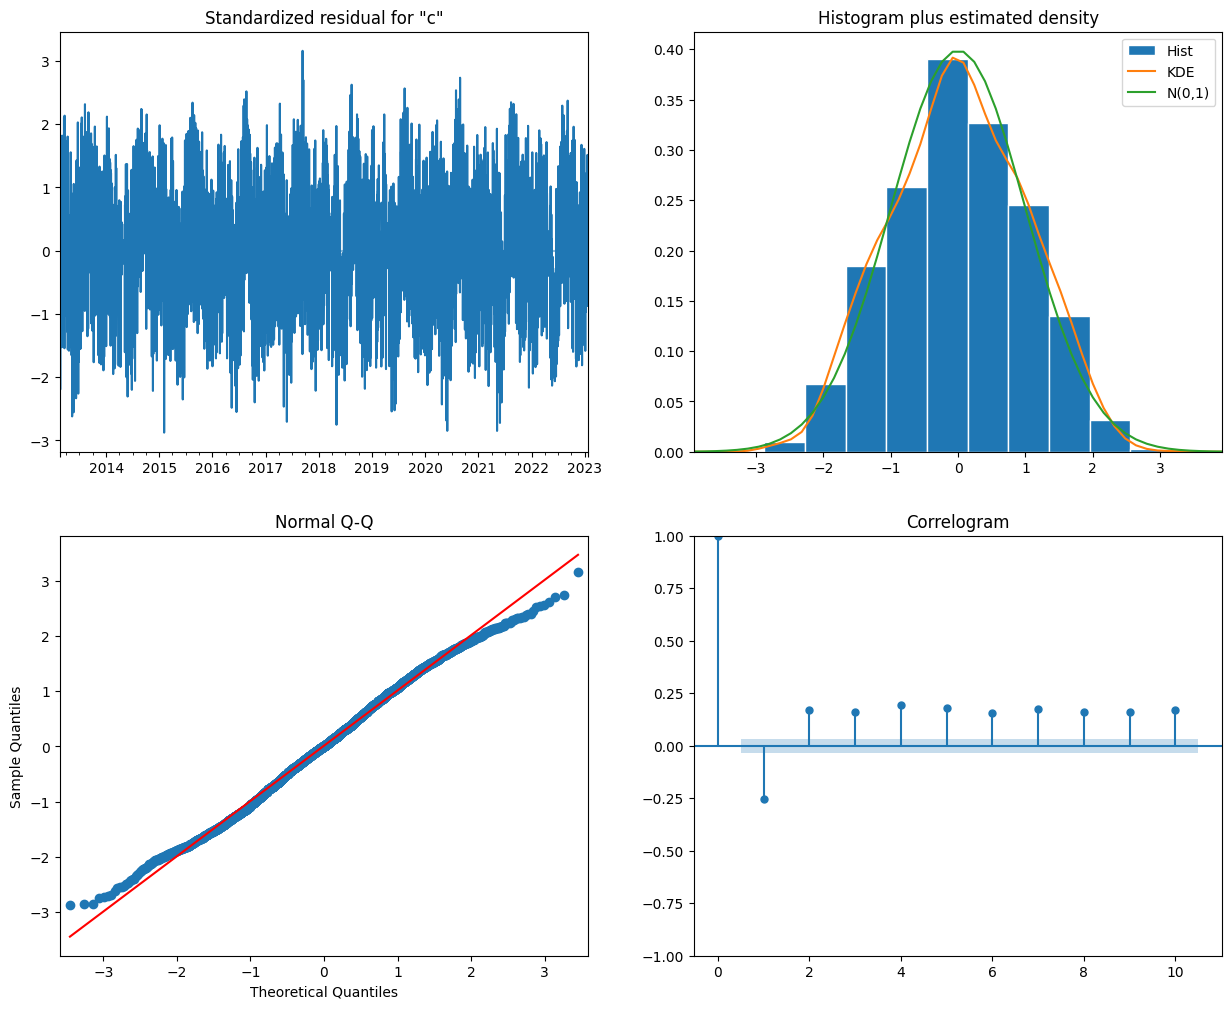

In [40]:
# Fit SARIMA model
sarima_model = SARIMAX(data['cycle'],
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_result = sarima_model.fit()

# Print out summary
print(sarima_result.summary())
#validation
# Diagnostic plots
sarima_result.plot_diagnostics(figsize=(15, 12))
plt.show()


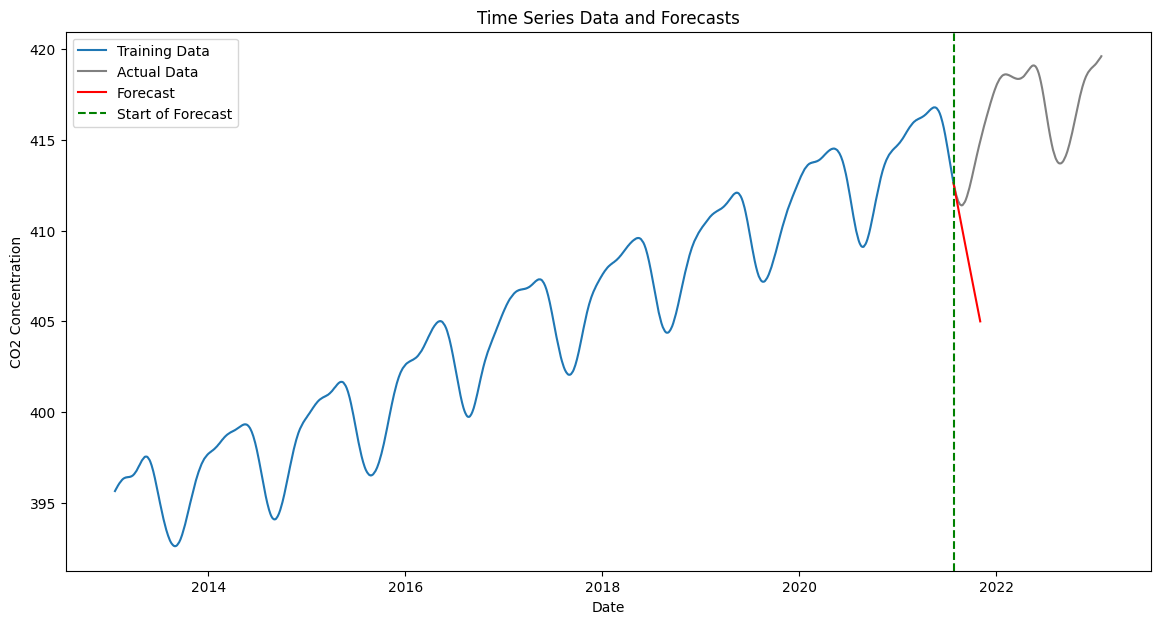

In [41]:
# Prepare the data and the dates as NumPy arrays
dates = np.array(data.index)  # Convert index to NumPy array for safe plotting
actual_data_array = np.array(data['cycle'])  # Convert Pandas series to NumPy array

# Assuming forecast_horizon and end_train are defined
forecast_horizon = 100
end_train = int(len(data) * 0.85)

# Assume model_fit is already the fitted SARIMAX model from previous steps
forecast = model_fit.forecast(steps=forecast_horizon)
forecast_array = np.array(forecast)  # Ensure forecast is also a NumPy array

# Dates for the forecast period
forecast_dates = dates[end_train:end_train + forecast_horizon]

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(dates[:end_train], actual_data_array[:end_train], label='Training Data')
plt.plot(dates[end_train:], actual_data_array[end_train:], label='Actual Data', color='gray')
plt.plot(forecast_dates, forecast_array, label='Forecast', color='red')
plt.axvline(x=dates[end_train], color='green', linestyle='--', label='Start of Forecast')
plt.title('Time Series Data and Forecasts')
plt.xlabel('Date')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.show()
